<a href="https://colab.research.google.com/github/AG-Raul/ML_TFG_Reconocimiento/blob/main/TFG_Reconocimiento_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Crear carpetas para subir los ZIP con las imagenes de cada categoría
!mkdir Perros
!mkdir Coches
!mkdir Aviones

mkdir: cannot create directory ‘Perros’: File exists
mkdir: cannot create directory ‘Coches’: File exists
mkdir: cannot create directory ‘Aviones’: File exists


In [ ]:
# Entrar en carpeta y descomprimir el archivo zip

%cd /content/Perros
!unzip /content/Perros/Perros.zip
%cd ..
%cd /content/Coches
!unzip /content/Coches/Coches.zip
%cd /content/Aviones
!unzip /content/Aviones/Aviones.zip
%cd ..


/content/Perros
Archive:  /content/Perros/Perros.zip
  inflating: Perros/_107435681_perro1.jpg  
  inflating: Perros/02558cf2-8be1-4199-8f32-85fa699a3738_16-9-discover-aspect-ratio_default_0.jpg  
  inflating: Perros/0d59df92-65bb-4ee6-9417-6c5bb50e33d7_16-9-discover-aspect-ratio_default_0.jpg  
  inflating: Perros/10_1615903151158.jpeg  
  inflating: Perros/1636307686_778477_1636307902_noticia_normal_recorte1.jpg  
  inflating: Perros/16456899624763.jpg  
  inflating: Perros/1651176276_950538_1651176481_noticia_normal_recorte1.jpg  
  inflating: Perros/16530529447979.jpg  
  inflating: Perros/1653826510_995351_1653826595_noticia_normal_recorte1.jpg  
  inflating: Perros/1657188639741_articulo-en-que-casos-es-obligatorio-contratar-un-seguro-para-perros.jpg  
  inflating: Perros/16631513469612.jpg  
  inflating: Perros/1920_Comportamiento_perros_teaser.jpg  
  inflating: Perros/200_1615974073876.jpeg  
  inflating: Perros/2022080111514833865.jpg  
  inflating: Perros/202931.jpg       
 

In [ ]:
# Borrar los archivo ZIP
!rm -rf /content/Coches/Coches.zip
!rm -rf /content/Perros/Perros.zip
!rm -rf /content/Aviones/Aviones.zip


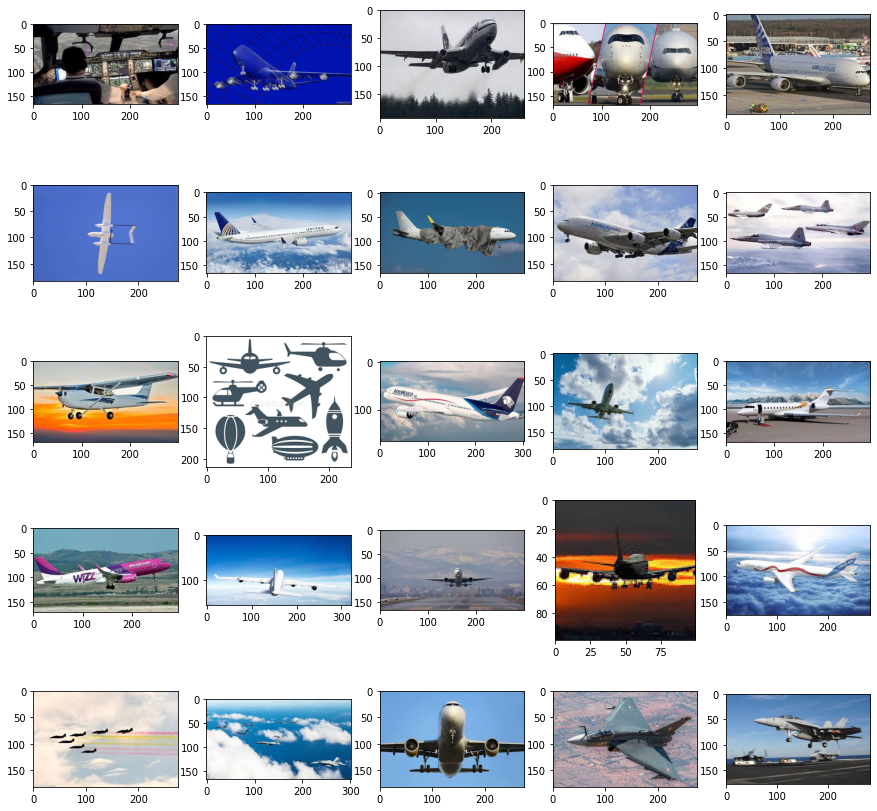

In [ ]:
# Sacamos algunas imagenes de ejemplo por pantalla
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/Aviones/Aviones'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
# Preparamos carpetas para el set de datos

!mkdir dataset
!mkdir dataset/avion
!mkdir dataset/coche
!mkdir dataset/perro

In [ ]:
#  Sacamos por pantalla el número de imágenes de cada categoria
!ls /content/Coches/Coches | wc -l ## 549
!ls /content/Aviones/Aviones| wc -l ## 614
!ls /content/Perros/Perros | wc -l ## 775

549
614
775


In [ ]:
# Copiar imágenes y limitar el número de imágenes al menor de los tres


import shutil ## Nos servira para poder copiar o eliminar archivos o colecciones de archivos 
carpeta_fuente = '/content/Aviones/Aviones'
carpeta_destino = '/content/dataset/avion'

imagenes = os.listdir(carpeta_fuente)

for e, catimagenes in enumerate(imagenes):
  if e < 549:
    shutil.copy(carpeta_fuente + '/' + catimagenes, carpeta_destino + '/' + catimagenes)

In [ ]:
carpeta_fuente = '/content/Coches/Coches'
carpeta_destino = '/content/dataset/coche'

imagenes = os.listdir(carpeta_fuente)

for e, catimagenes in enumerate(imagenes):
  if e < 549:
    shutil.copy(carpeta_fuente + '/' + catimagenes, carpeta_destino + '/' + catimagenes)

In [ ]:
carpeta_fuente = '/content/Perros/Perros'
carpeta_destino = '/content/dataset/perro'

imagenes = os.listdir(carpeta_fuente)

for e, catimagenes in enumerate(imagenes):
  if e < 549:
    shutil.copy(carpeta_fuente + '/' + catimagenes, carpeta_destino + '/' + catimagenes)

In [ ]:
# Mostramos el número de nuevo y comprobamos que coinciden
!ls /content/dataset/avion| wc -l
!ls /content/dataset/coche | wc -l
!ls /content/dataset/perro | wc -l

549
549
549


Found 1318 images belonging to 3 classes.
Found 327 images belonging to 3 classes.


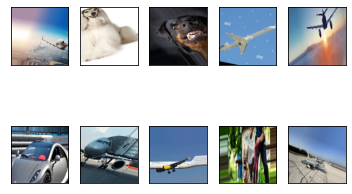

In [ ]:
# Aumentamos el numero de imágenes mediante el uso de IDG
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 ## Reservamos un 20% para pruebas de validación
)

# Creamos los dos sets que se van a usar
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

# Imprimimos algunas imágenes para comprobar
for imagen, etiqueta in data_gen_entrenamiento:
  for e in range(10):
    plt.subplot(2,5,e+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[e])
  break
plt.show()

In [ ]:
# Importamos google/mobilenet_v2

import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
# Congelamos los datos del modelo cargado
mobilenetv2.trainable = False

In [ ]:
model = tf.keras.Sequential(mobilenetv2)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
Total params: 2,257,984
Trainable params: 0
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Añadimos la modificación de la última capa densa para obtener las tres salidas de interés
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# Compilamos el modelo 
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Entrenamos el modelo
EPOCAS = 25

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 0.4908 - accuracy: 0.7967

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


42/42 [==============================] - 35s 606ms/step - loss: 0.4908 - accuracy: 0.7967 - val_loss: 0.1636 - val_accuracy: 0.9633
Epoch 2/25
42/42 [==============================] - 25s 599ms/step - loss: 0.1495 - accuracy: 0.9560 - val_loss: 0.1192 - val_accuracy: 0.9633
Epoch 3/25
42/42 [==============================] - 24s 573ms/step - loss: 0.1127 - accuracy: 0.9681 - val_loss: 0.1232 - val_accuracy: 0.9572
Epoch 4/25
42/42 [==============================] - 24s 574ms/step - loss: 0.1062 - accuracy: 0.9636 - val_loss: 0.0813 - val_accuracy: 0.9786
Epoch 5/25
42/42 [==============================] - 24s 571ms/step - loss: 0.0862 - accuracy: 0.9772 - val_loss: 0.0681 - val_accuracy: 0.9725
Epoch 6/25
42/42 [==============================] - 24s 567ms/step - loss: 0.0811 - accuracy: 0.9727 - val_loss: 0.1011 - val_accuracy: 0.9602
Epoch 7/25
42/42 [==============================] - 24s 567ms/step - loss: 0.0884 - accuracy: 0.9742 - val_loss: 0.0786 - val_accuracy: 0.9786
Epoch 8/25

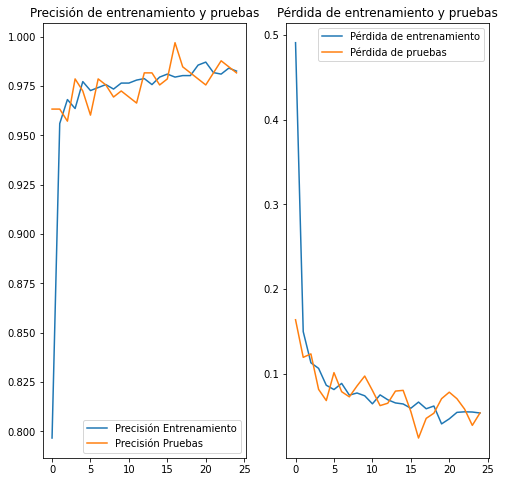

In [ ]:
# Creamos algunas graficas para analizar la precisión que ha obtenido nuestro modelo
acc = historial.history['accuracy']
valor_acc = historial.history['valor_accuracy']

loss = historial.history['loss']
valor_loss = historial.history['valor_loss']

rango_epocas = range(25)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, valor_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, valor_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
# Analizamos las imágenes de internet mediante su URL 
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
# 0 = avion, 1 = coche, 2 = perro
url = 'https://cms-gauib.s3.eu-central-1.amazonaws.com/noticias/imagenes/EuroTaller%2C_luces%2C_coche%2C_iluminaci%C3%B3n%2C_noche%2C_nocturno_1557476993.jpg?v=153'
prediccion = categorizar (url)

if prediccion == 0:
  print("Es un avión")
elif prediccion == 1:
  print("Es un coche")
else:
  print("Es un perro")


1/1 [==============================] - 0s 20ms/step
Es un coche


In [ ]:
# Creamos la carpeta para exportarla 
!mkdir -p carpeta_final/TFG_Reconocimiento

In [ ]:
# Guardar el modelo en formato SavedModel
modelo.save('carpeta_final/TFG_Reconocimiento')

In [ ]:
!zip -r modelo_TFG.zip /content/carpeta_final/TFG_Reconocimiento

  adding: content/carpeta_final/TFG_Reconocimiento/ (stored 0%)
  adding: content/carpeta_final/TFG_Reconocimiento/saved_model.pb (deflated 92%)
  adding: content/carpeta_final/TFG_Reconocimiento/variables/ (stored 0%)
  adding: content/carpeta_final/TFG_Reconocimiento/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/carpeta_final/TFG_Reconocimiento/variables/variables.index (deflated 78%)
  adding: content/carpeta_final/TFG_Reconocimiento/assets/ (stored 0%)
  adding: content/carpeta_final/TFG_Reconocimiento/keras_metadata.pb (deflated 80%)
